## Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv('/content/drive/MyDrive/BE Practicals/ML/uber.csv')

In [12]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [13]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [14]:
df.isna().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [15]:
df.fillna(value=df['dropoff_longitude'].mean(), inplace=True)
df.fillna(value=df['dropoff_latitude'].mean(), inplace=True)

In [16]:
df.isna().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [17]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [18]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [19]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [20]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [21]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [22]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce', utc=True)

In [23]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [24]:
df['hour'] = df.pickup_datetime.dt.hour
df['day'] = df.pickup_datetime.dt.day
df['month'] = df.pickup_datetime.dt.month
df['dayOfWeek'] = df.pickup_datetime.dt.dayofweek
df['year'] = df.pickup_datetime.dt.year
df['dayName'] = df.pickup_datetime.dt.day_name()

In [25]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,dayOfWeek,year,dayName
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3,2015,Thursday
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4,2009,Friday
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0,2009,Monday
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4,2009,Friday
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3,2014,Thursday


In [26]:
x = df['fare_amount'].value_counts() # counts number of occurence of a unique data value

In [27]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
hour,int32
day,int32
month,int32


In [28]:
df.drop(['dayName'], axis=1, inplace=True)

In [29]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,dayOfWeek,year
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3,2015
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4,2009
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0,2009
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4,2009
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,3,2014


In [30]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
hour,int32
day,int32
month,int32


<Axes: >

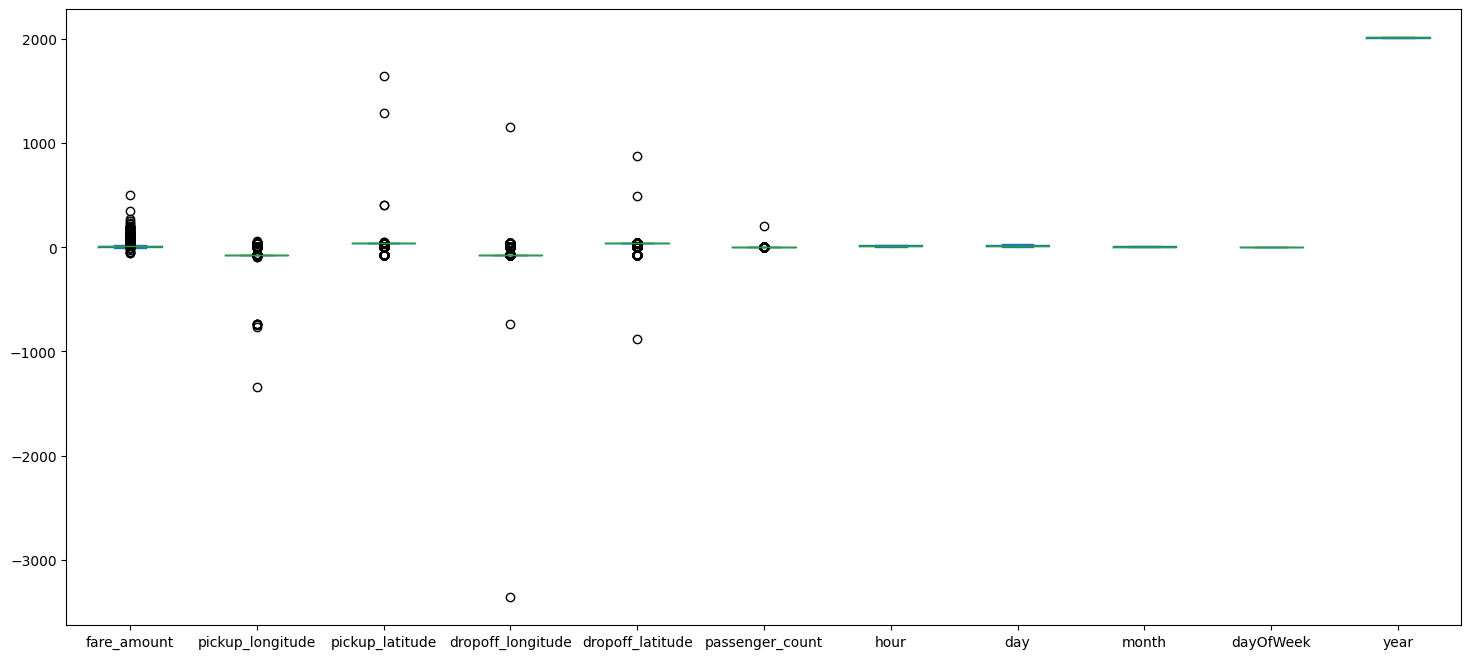

In [31]:
df.plot(kind='box', subplots=False, layout=(7,2), figsize=(18,8))

,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
hour,"Axes(0.125,0.448049;0.352273x0.0939024)"
day,"Axes(0.547727,0.448049;0.352273x0.0939024)"
month,"Axes(0.125,0.335366;0.352273x0.0939024)"
dayOfWeek,"Axes(0.547727,0.335366;0.352273x0.0939024)"


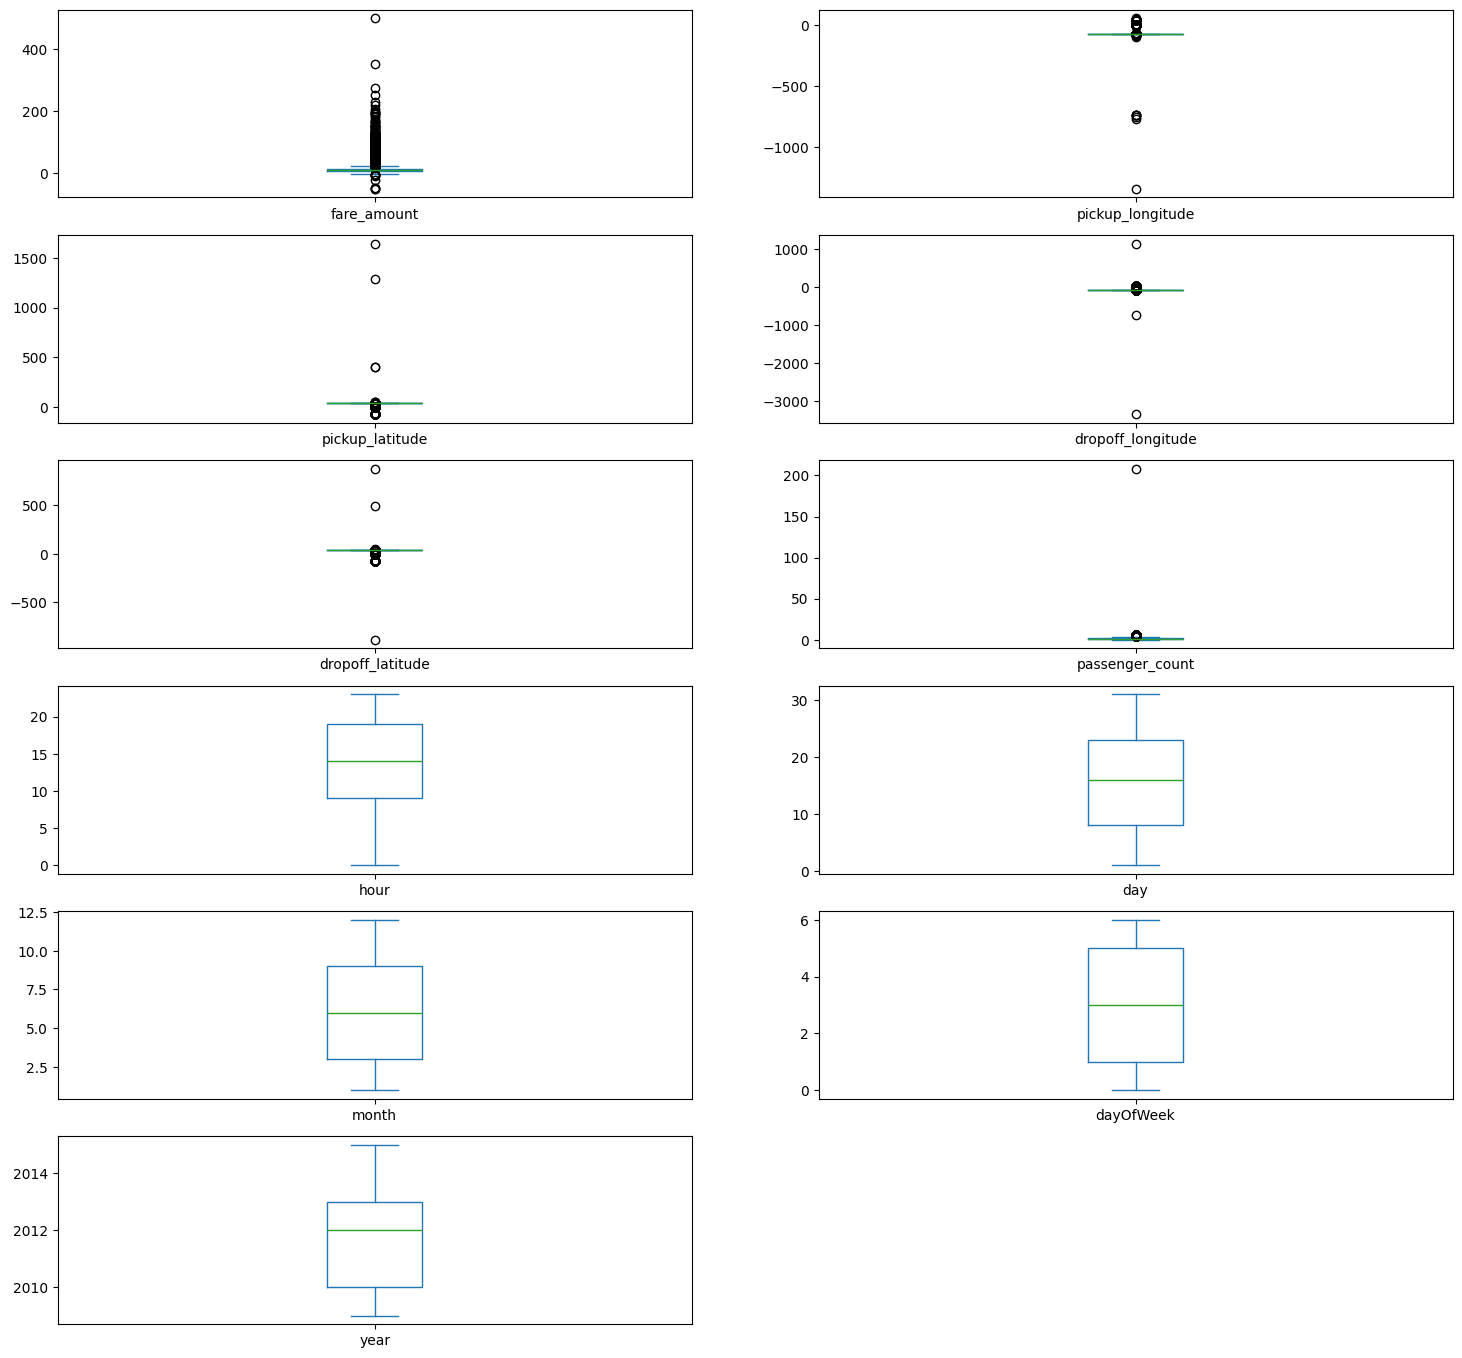

In [32]:
df.plot(kind='box', subplots=True, layout=(7,2), figsize=(18,20))

In [33]:
def removeOutlier(df,col):

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lowerLimit = q1 - 1.5 * IQR
    upperLimit = q3 + 1.5 * IQR
    df = df[(df[col] >= lowerLimit) & (df[col] <= upperLimit)]
    return df

In [34]:
for c in df.columns:

    df = removeOutlier(df, c)

,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
hour,"Axes(0.125,0.448049;0.352273x0.0939024)"
day,"Axes(0.547727,0.448049;0.352273x0.0939024)"
month,"Axes(0.125,0.335366;0.352273x0.0939024)"
dayOfWeek,"Axes(0.547727,0.335366;0.352273x0.0939024)"


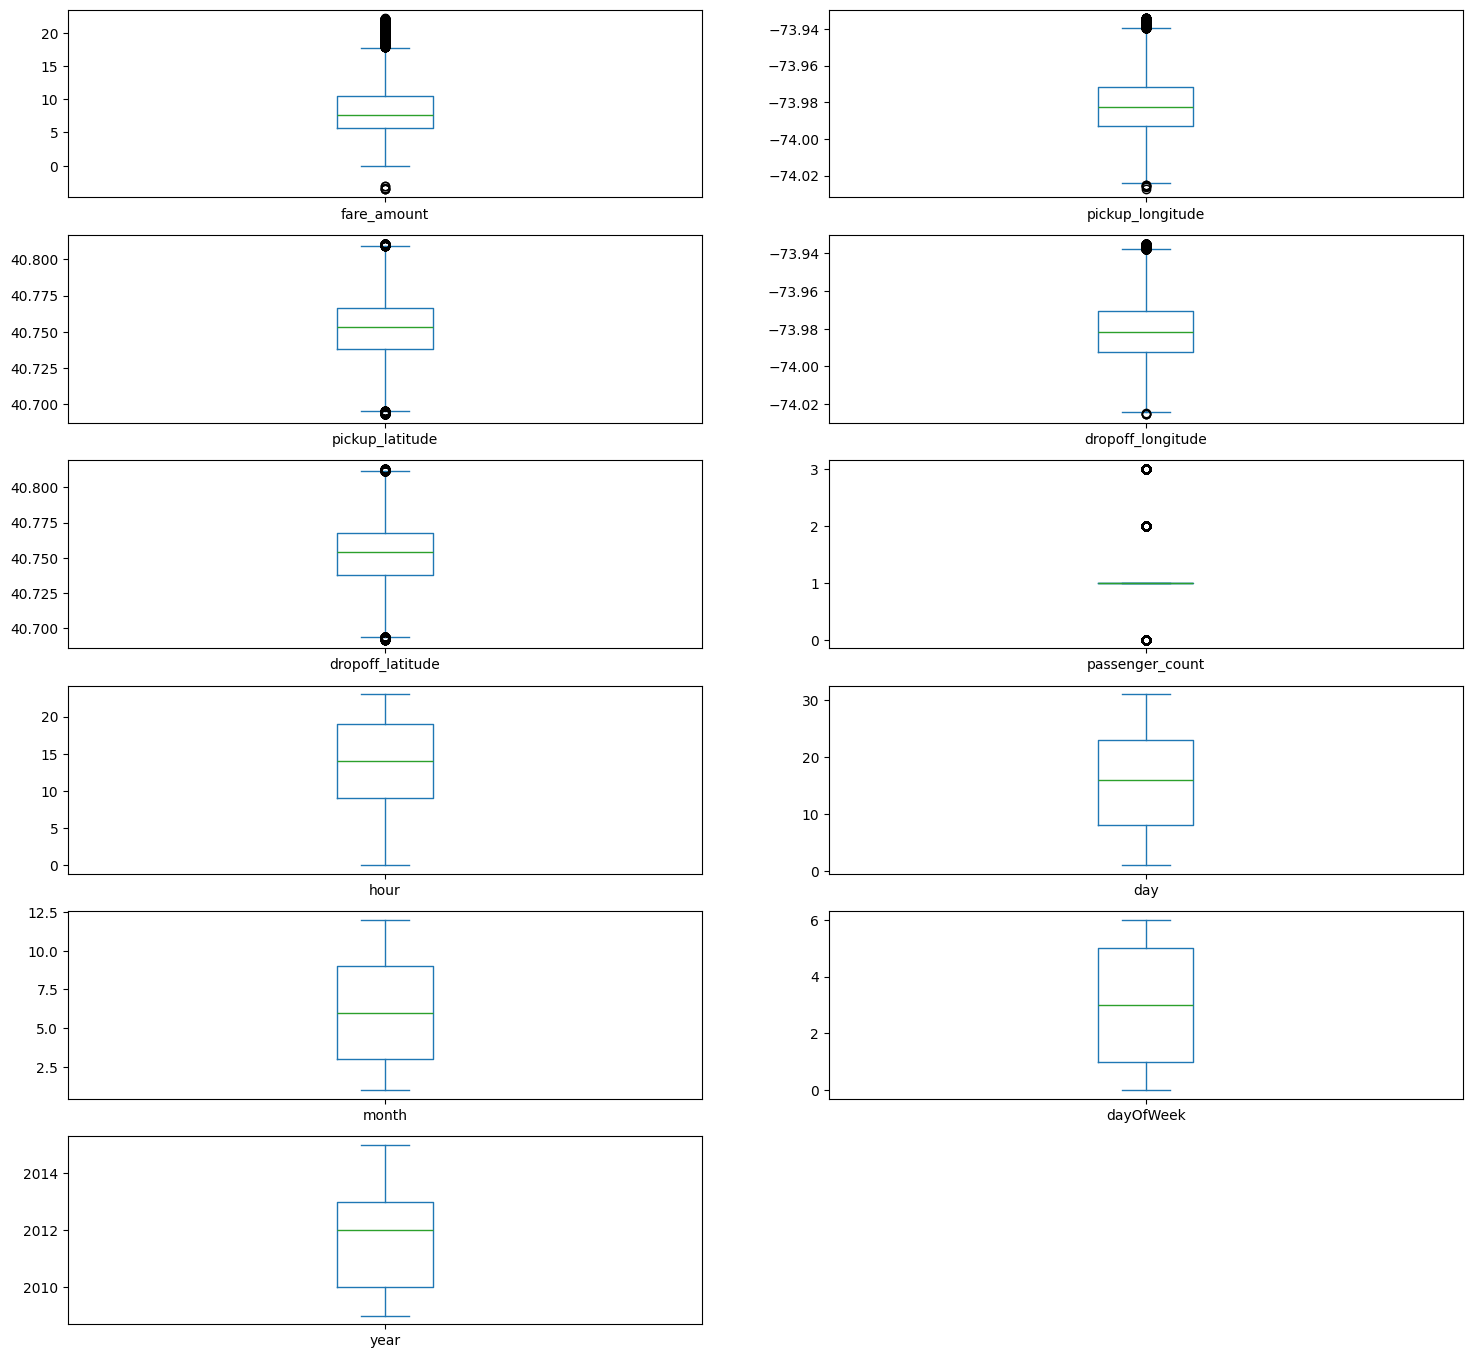

In [35]:
df.plot(kind='box', subplots=True, layout=(7,2), figsize=(18,20))

In [36]:
# checkk the correlation
corr_ds = df.corr()
corr_ds

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,dayOfWeek,year
fare_amount,1.000000,0.160394,-0.052798,-0.076539,-0.023167,-0.094152,0.019572,0.006046,0.007224,0.028798,0.012933,0.154908
pickup_datetime,0.160394,1.000000,-0.003281,-0.000884,0.003870,0.001759,-0.021697,0.005419,0.000668,0.040399,0.005144,0.987946
pickup_longitude,-0.052798,-0.003281,1.000000,0.693656,0.409016,0.353741,-0.022952,0.013539,-0.004946,-0.002471,-0.034310,-0.002829
pickup_latitude,-0.076539,-0.000884,0.693656,1.000000,0.334680,0.499956,-0.019989,0.034327,-0.001917,0.002275,-0.050805,-0.001225
dropoff_longitude,-0.023167,0.003870,0.409016,0.334680,1.000000,0.651683,-0.016413,0.000404,-0.010045,-0.004680,-0.027932,0.004697
dropoff_latitude,-0.094152,0.001759,0.353741,0.499956,0.651683,1.000000,-0.013321,0.026124,-0.006094,-0.000405,-0.038742,0.001876
passenger_count,0.019572,-0.021697,-0.022952,-0.019989,-0.016413,-0.013321,1.000000,0.034175,0.001036,0.007192,0.065425,-0.022708
hour,0.006046,0.005419,0.013539,0.034327,0.000404,0.026124,0.034175,1.000000,0.003957,-0.003213,-0.079647,0.005443
day,0.007224,0.000668,-0.004946,-0.001917,-0.010045,-0.006094,0.001036,0.003957,1.000000,-0.018587,0.005335,-0.009239
month,0.028798,0.040399,-0.002471,0.002275,-0.004680,-0.000405,0.007192,-0.003213,-0.018587,1.000000,-0.009308,-0.114230


<Axes: >

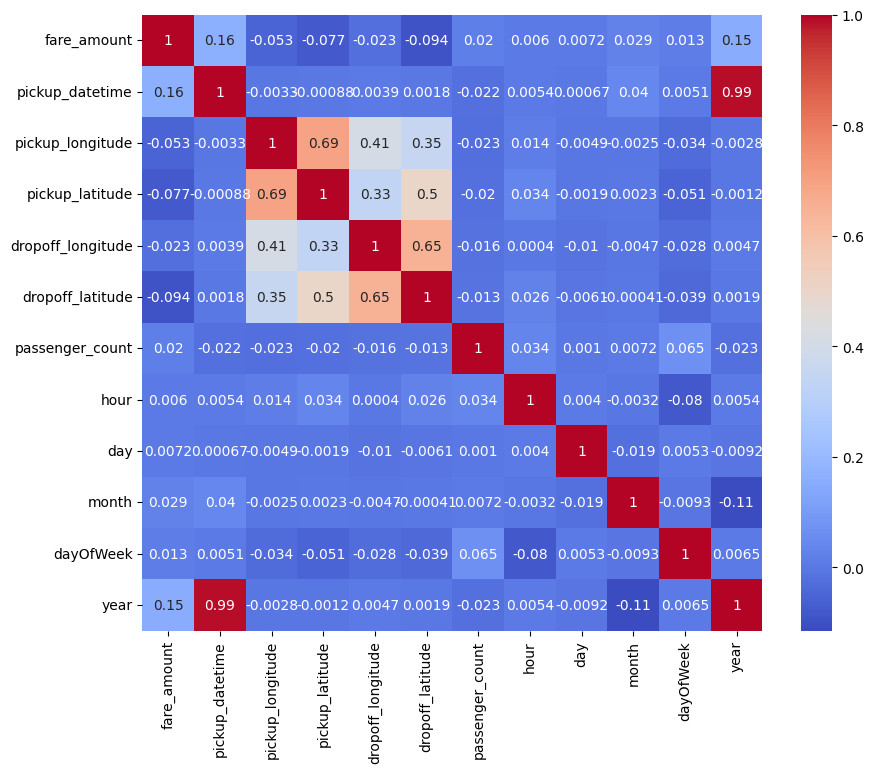

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_ds, annot=True, cmap='coolwarm')

In [38]:
df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,dayOfWeek,year
199986,12.0,2013-09-07 09:54:32+00:00,-73.964772,40.760174,-73.996794,40.763152,1,9,7,9,5,2013
175582,5.0,2013-11-20 08:06:00+00:00,-73.982122,40.777112,-73.973600,40.789452,1,8,20,11,2,2013
72585,6.5,2009-05-28 20:29:51+00:00,-73.972008,40.782089,-73.952316,40.781211,1,20,28,5,3,2009
178611,7.5,2015-03-14 00:15:46+00:00,-73.998863,40.744678,-73.988106,40.764027,3,0,14,3,5,2015
173463,4.5,2013-04-21 12:53:00+00:00,-73.985810,40.767913,-73.993723,40.762008,1,12,21,4,6,2013


In [40]:
!pip install haversine

In [41]:
from haversine import haversine
traveld_dist = []
for pos in range(len(df['pickup_longitude'])):
    #print(pos)
    long1, lat1, long2, lat2 = [df.iloc[pos]['pickup_longitude'], df.iloc[pos]['pickup_latitude'], df.iloc[pos]['dropoff_longitude'], df.iloc[pos]['dropoff_latitude']]
    loc1 = (lat1, long1)
    loc2 = (lat2, long2)
    loc = haversine(loc1, loc2)
    traveld_dist.append(loc)

df['traveld_dist_km'] = traveld_dist


In [42]:
df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,dayOfWeek,year,traveld_dist_km
125989,6.5,2013-07-29 16:42:57+00:00,-73.952052,40.769364,-73.966807,40.756521,1,16,29,7,0,2013,1.893058
1396,7.7,2012-07-13 19:40:37+00:00,-73.999122,40.739392,-73.981300,40.737975,3,19,13,7,4,2012,1.509780
32786,8.9,2010-10-10 21:08:35+00:00,-73.964672,40.807203,-73.979630,40.776224,1,21,10,10,6,2010,3.667658
170444,21.5,2014-10-27 11:46:01+00:00,-74.008855,40.706057,-73.971517,40.760665,1,11,27,10,0,2014,6.838750
138065,7.5,2015-01-22 20:44:51+00:00,-73.967804,40.756264,-73.989388,40.757156,1,20,22,1,3,2015,1.820669


In [43]:
df = df[(df['traveld_dist_km'] >= 1) & (df['traveld_dist_km'] < 30)]

In [44]:
bool_df = df.isnull()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

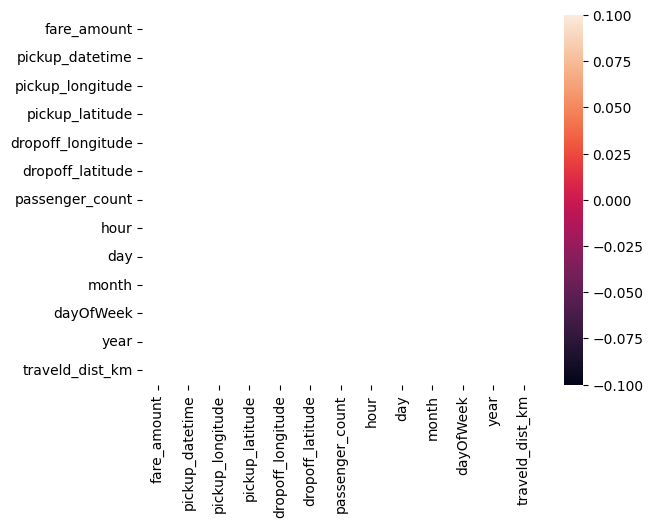

In [45]:
sns.heatmap(bool_df.corr())

In [46]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'dayOfWeek', 'year', 'traveld_dist_km'],
      dtype='object')

In [47]:
x = df[df.columns[2:]]

In [48]:
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,dayOfWeek,year,traveld_dist_km
0,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,3,2015,1.683325
1,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,4,2009,2.457593
2,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,0,2009,5.036384
3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,4,2009,1.661686
8,-73.975187,40.745767,-74.002720,40.743537,1,9,17,2,4,2012,2.332714


In [49]:
y = df['fare_amount']

In [50]:
y.head()

,fare_amount
0,7.5
1,7.7
2,12.9
3,5.3
8,9.7


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scalar = StandardScaler()

In [55]:
scalar.fit_transform(X_train)

array([[-0.97659079, -0.87910857,  0.69362649, ..., -0.53290672,
        -0.92467165, -0.03419658],
       [-0.66469703, -0.20382041,  0.54675049, ..., -1.04841757,
        -1.4650688 , -0.59254447],
       [ 1.77863685,  1.53056054,  0.35172522, ..., -0.01739587,
        -0.92467165, -0.56853469],
       ...,
       [-1.29141167, -1.1988833 , -0.29541755, ..., -1.56392842,
         0.15612265, -0.80170878],
       [ 0.36807738,  1.56601821,  0.6983052 , ..., -1.04841757,
         0.69651981,  0.57795375],
       [ 0.76523124,  1.74251025,  0.0958767 , ..., -1.56392842,
        -0.3842745 ,  1.4184178 ]])

In [56]:
scalar.fit(X_test)

StandardScaler()

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
reg = LinearRegression()

In [59]:
reg.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = reg.predict(X_test)

In [61]:
y_pred

array([ 8.94162382,  9.24038177,  9.3799241 , ...,  9.55761213,
       11.92830028, 10.24821691])

In [62]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [63]:
r2 = r2_score(y_test, y_pred)

In [64]:
rmse = root_mean_squared_error(y_test, y_pred)

In [65]:
print('r2: ', r2, '\nrmse: ', rmse)

r2:  0.6695533727456657 
rmse:  2.164330620091514
